In [18]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.13.0


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


각 이미지는 하나의 레이블에 매핑되어 있습니다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다:

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

6만개의 데이터와 28x28 픽셀로 표현된다

In [8]:
len(train_labels)


60000

각 레이블은 0과 9사이의 정수이다

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape


(10000, 28, 28)

In [16]:
len(test_labels)


10000

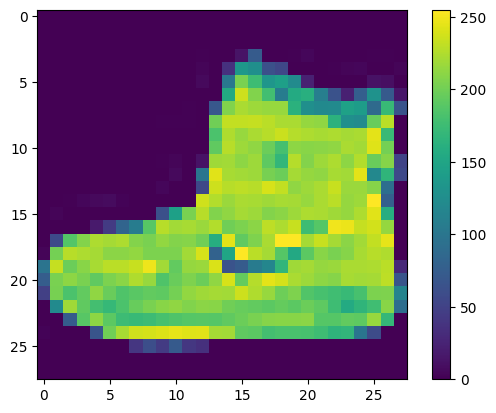

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

In [20]:
train_images = train_images / 255.0

test_images = test_images / 255.0

훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해 보죠. 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마칩니다.

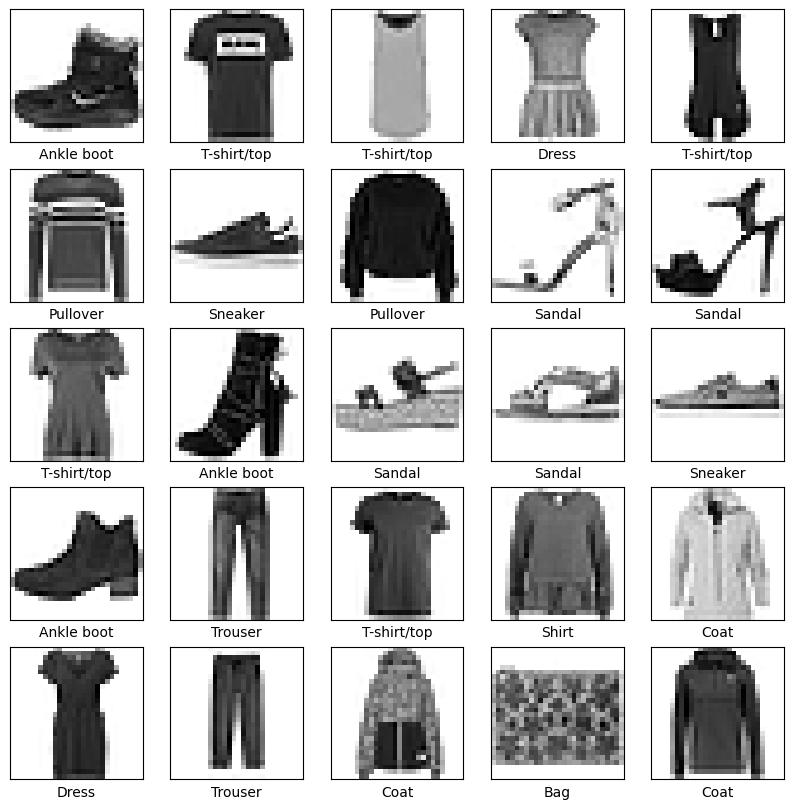

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델구성

대부분 딥러닝은 간단한 층을 연결하여 구성됩니다. tf.keras.layers.Dense와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.

In [22]:
# 층 설정
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요합니다. 다음은 모델의 컴파일 단계에서 추가됩니다.

손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.

옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.

메트릭 — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.



In [23]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
# 모델 훈련

model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 1s 637us/step - loss: 0.1203 - accuracy: 0.9550
Epoch 2/50
1875/1875 [==============================] - 1s 628us/step - loss: 0.1159 - accuracy: 0.9565
Epoch 3/50
1875/1875 [==============================] - 1s 621us/step - loss: 0.1145 - accuracy: 0.9571
Epoch 4/50
1875/1875 [==============================] - 1s 617us/step - loss: 0.1119 - accuracy: 0.9581
Epoch 5/50
1875/1875 [==============================] - 1s 616us/step - loss: 0.1096 - accuracy: 0.9592
Epoch 6/50
1875/1875 [==============================] - 1s 641us/step - loss: 0.1069 - accuracy: 0.9607
Epoch 7/50
1875/1875 [==============================] - 1s 615us/step - loss: 0.1073 - accuracy: 0.9610
Epoch 8/50
1875/1875 [==============================] - 1s 621us/step - loss: 0.1038 - accuracy: 0.9609
Epoch 9/50
1875/1875 [==============================] - 1s 619us/step - loss: 0.1044 - accuracy: 0.9609
Epoch 10/50
1875/1875 [==============================] - 1s 618u

In [44]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.7294 - accuracy: 0.8866 - 123ms/epoch - 394us/step

Test accuracy: 0.8866000175476074


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문입니다. 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말합니다.



# 예측하기

훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다. 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다.

In [45]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [46]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 346us/step


In [47]:
predictions[0]

array([0.0000000e+00, 0.0000000e+00, 1.8288809e-34, 0.0000000e+00,
       0.0000000e+00, 1.9405279e-15, 3.9489950e-33, 1.5467462e-11,
       2.4704852e-31, 1.0000000e+00], dtype=float32)

이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. 가장 높은 신뢰도를 가진 레이블을 찾아보죠:

In [50]:
np.argmax(predictions[1])


2

모델은 이 이미지가 앵클 부츠(class_name[9])라고 가장 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인해 보죠:

In [52]:
test_labels[1]

2

10개 클래스에 대한 예측을 모두 그래프로 표현해 보겠습니다:

In [57]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

예측 확인하기

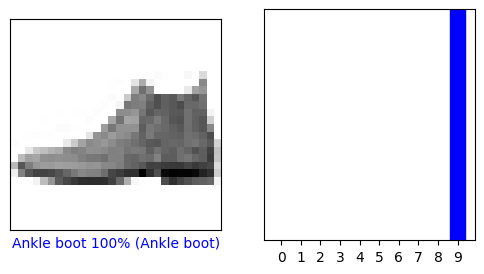

In [58]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

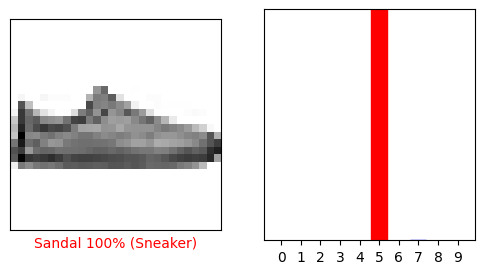

In [55]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

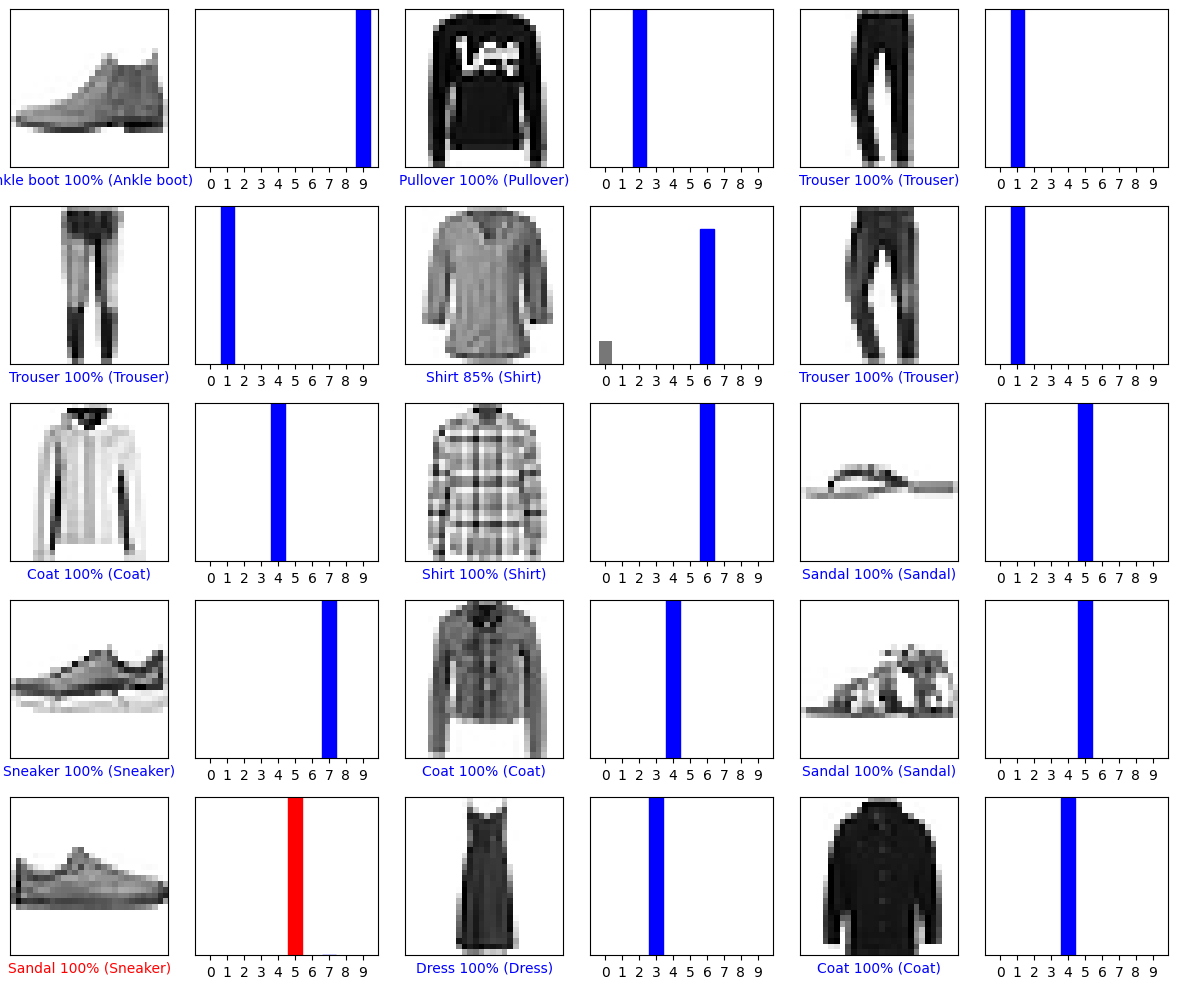

In [56]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 훈련된 모델 사용하기

In [59]:
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:

In [60]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [61]:
# 이미지 예측 생성하기

predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 13ms/step
[[1.7837694e-13 0.0000000e+00 1.0000000e+00 3.9484830e-33 1.2799508e-09
  7.8323742e-30 1.2184481e-12 1.5245791e-38 2.4625116e-27 0.0000000e+00]]


In [62]:
np.argmax(predictions_single[0])

2

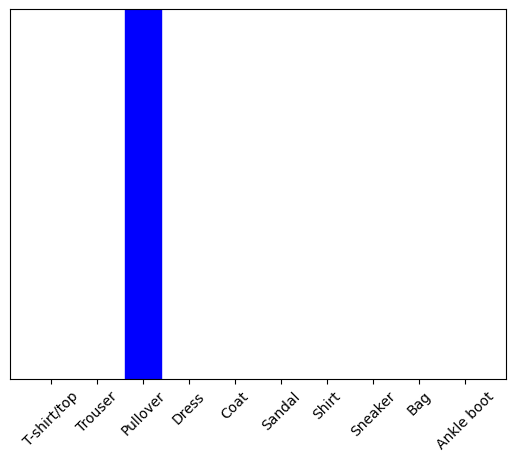

In [38]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [63]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy : ', test_acc)

313/313 [==============================] - 0s 437us/step - loss: 0.7294 - accuracy: 0.8866
Test accuracy :  0.8866000175476074
